# Business Opportunities Detector

The aim of this project is to create a model able of to correctly say if an article from a journal is about the earnings of a journal or not (**business opportunity**). The procedure to create the model is broken down to the following steps: **data collection**, **data preprocessing**, **data visualisation**, **classification** and finally **evaluation**.

In this second experiment, we make use of TF-IDF for feature engineering, enhanced by NLP. Then, we train an SVM classifier on the thus obtained feature matrix

## Data Collection

In this step, we will build a corpus by collecting the text content from the XML files referred to in *train.csv*. This will pose as the training set. We will also keep the labels of the associated XML files

In [48]:
import pandas as pd
from lxml import etree

# Collect the training data file
train_df = pd.read_csv("train.csv")

# Texts contained in each XML file
texts = []
# Labels associated to the XML file
labels = []

for sample in train_df.values:
    # For each XML file referenced in train.csv, collect the text contained in it
    xml_file = etree.parse("data/"+sample[1])
    xml_text = xml_file.xpath('/BODY')[0].text or ''
    texts.append(xml_text)
    # The label
    labels.append(sample[2])
    
news_data = pd.DataFrame()
news_data['text'] = texts
news_data['label'] = labels
news_data

,text,label
0,Showers continued throughout the week in\nthe ...,0
1,Standard Oil Co and BP North America\nInc said...,0
2,Texas Commerce Bancshares Inc's Texas\nCommerc...,0
3,BankAmerica Corp is not under\npressure to act...,0
4,The U.S. Agriculture Department\nreported the ...,0
5,Argentine grain board figures show\ncrop regis...,0
6,Red Lion Inns Limited Partnership\nsaid it fil...,0
7,Moody's Investors Service Inc said it\nlowered...,0
8,Champion Products Inc said its\nboard of direc...,1
9,Computer Terminal Systems Inc said\nit has com...,0


## Data Preprocessing

Irrespective of the machine learning method we will use, the document need to be represented as a set of features. Here, I will make use of the tf-idf weighting model

In [4]:
import spacy

text = "It was an honor to see you play and comment your games. Thank you, Micheal Jordan"
nlp = spacy.load('en_core_web_sm')
tokens = nlp(text)
for token in tokens:
  print(token.lemma_)

-PRON-
be
an
honor
to
see
-PRON-
play
and
comment
-PRON-
game
.
thank
-PRON-
,
micheal
jordan


In [6]:
# pip install spacy
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

spacy.prefer_gpu()
nlp = spacy.load('en_core_web_sm')
def lemmatize_tokens(doc):
    # Tokenize the sentence

    tokens = nlp(doc)
    
    # Lemmatize each of the word in the sentence
    # Meanwhile, remove stop words, punctuations and whitespaces
    lemmas = [token.lemma_.strip() for token in tokens if not token.is_stop and
             not token.is_punct and token.text.strip()]
    
    return lemmas

print("Creating the TF-IDF vectorizer...")
vectorizer = TfidfVectorizer(analyzer='word', tokenizer=lemmatize_tokens, max_features=100)
print("TF-IDF vectorizer loaded.")
print("Transforming the dataset...")
X = vectorizer.fit_transform(texts)  # Scipy sparse matrix
print("Vectorization completed.")
print(vectorizer.get_feature_names())

Creating the TF-IDF vectorizer...
TF-IDF vectorizer loaded.
Transforming the dataset...
Vectorization completed.
["'s", '10', '1985', '1986', '1987', '<', '>', 'add', 'agreement', 'american', 'analyst', 'april', 'bank', 'billion', 'board', 'bond', 'buy', 'capital', 'co', 'common', 'company', 'contract', 'corp', 'country', 'credit', 'ct', 'debt', 'december', 'dlr', 'dlrs', 'end', 'exchange', 'expect', 'export', 'fall', 'february', 'foreign', 'government', 'group', 'high', 'inc', 'include', 'increase', 'industry', 'interest', 'international', 'investment', 'issue', 'january', 'lead', 'loan', 'loss', 'ltd', 'march', 'market', 'mln', 'month', 'net', 'new', 'note', 'offer', 'official', 'oil', 'pay', 'pct', 'plan', 'president', 'price', 'product', 'profit', 'quarter', 'rate', 'record', 'report', 'reuter', 'rise', 'sale', 'say', 'security', 'sell', 'service', 'share', 'shr', 'spokesman', 'state', 'stock', 'system', 'tax', 'tell', 'term', 'time', 'today', 'tonne', 'total', 'trade', 'u.s', 'uni

In [0]:
print(X)

# Data visualization

In [19]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Converting scipy sparse matrix to numpy array (for plotting conveniences)
rep_X = X.toarray()
#print(rep_X)

# Standardizing the data
rep_X = StandardScaler().fit_transform(rep_X)
#print(rep_X)

# Projecting to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rep_X)
principalComponents

array([[-0.47144881,  1.64414658],
       [-1.5130241 , -1.37134873],
       [-0.38908509,  0.55286045],
       ...,
       [ 3.11373886, -2.10513505],
       [ 5.44947445, -0.72111528],
       [ 0.98513554, -0.07901652]])

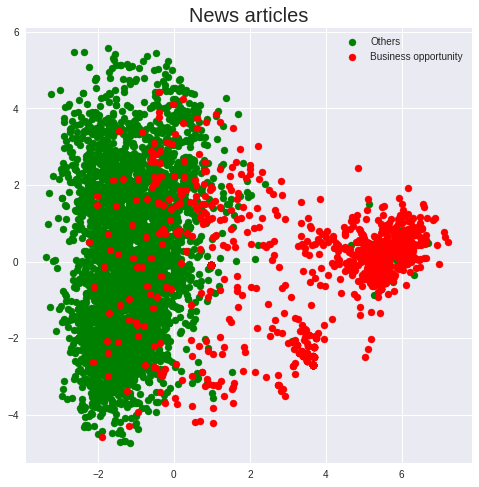

In [46]:
# Visualizing in 2D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
# ax.set_xlabel('Principal Component 1', fontsize=15)
# ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('News articles', fontsize=20)

targets = ['Others', 'Business opportunity']
target_indices = [0, 1]
colors = ['g', 'r']
for target, color in zip(target_indices, colors):
    indicesToKeep = news_data['label'] == target
    ax.scatter(principalComponents[indicesToKeep, 0],
              principalComponents[indicesToKeep, 1],
              c = color,
              s = 50,
              alpha = 1)
ax.legend(targets)
ax.grid(b = True)

# Classification

In [0]:
# Split the data into train and test split
from sklearn.model_selection import train_test_split

y = news_data['label'].values
X_train, X_test, y_train, y_test = train_test_split(rep_X, y, test_size=0.33)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_train, y_train)
# Training accuracy
accuracy_score(y_train, clf.predict(X_train))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9757462686567164

In [44]:
# Test accuracy
accuracy_score(y_test, clf.predict(X_test))

0.9545454545454546

In [45]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, clf.predict(X_test))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)

Precision: [0.95859375 0.9375    ]
Recall: [0.9847512  0.84319527]
F1-score: [0.97149644 0.88785047]
